# Introduction to Colab
In the previous notebook you learned some Markdown language. Now we are going to try out some Python code and make some plots using data we read from a url.

Created by Jessica Huynh-Westfall; Adapted from Wendy Lee
Last updated: August 12, 2025

Learning outcome: Learning how to use Google Colab to write simple python code
1. Creating simulated data
2. Reading in data from URL
3. Cumulative plots

# Matplotlib. Plotting and creating simulated data within jupyter notebook
Here we create a normal distribution probability density plot. First let's look at plotting a 2D line plot

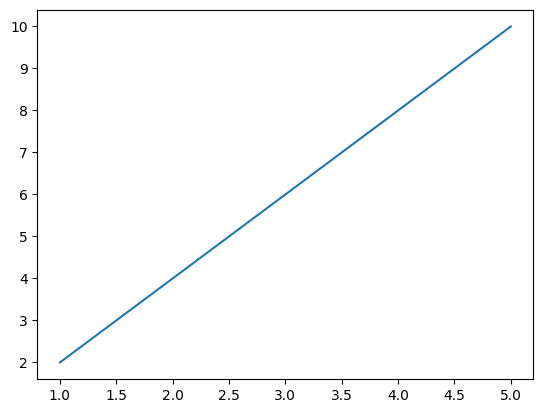

In [1]:
'''iMagic 'inline' backend to include matplotlib graphs in notebook'''
%matplotlib inline

### Import matplotlib module
import matplotlib.pyplot as plt

### Data to create a 2D line plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
# plt.show() #optional if using 'inline'

In [ ]:
'''Normal distribution probability density plot'''
### Import your libraries/packages
import numpy as np
import scipy.stats as stats

### When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib.pyplot as plots

### Generate plotting data using probability density function to plot a normal continuous random distribution
mu = 0 #mean
std = 1 #variance
x = np.linspace(start=-4, stop=4, num=100) #return 100 evenly spaced numbers over a specified interval (between -4 and 4)
y = stats.norm.pdf(x, mu, std)
# plt.plot(x, y)
# plt.show()

# Read in URL and do some analysis (cumulative plot)

In [ ]:
'''Read in input data from url'''
### Import your libraries/packages
# !pip install datascience
from datascience import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from urllib.request import urlopen
import re

### Write a function to take in url, read it and return data
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


### Let's quickly read the book and count number of instances of characters
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:] #there are 44 instance of 44 before the first chapter

### Display the chapters of Huckleberry Finn in a table.
Table().with_column('Chapters', huck_finn_chapters)
# print("Number of occurences of Tom per chapter ", np.char.count(huck_finn_chapters, 'Tom')) #count the number of occurences of 'Tom' in each chapter

### Create a table with the counts of three names for each chapter: 'Tom', 'Jim', and 'Huck'.
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])

### Call the count table
# counts

In [ ]:
'''Plot the cumulative counts for 43 chapters:'''
### A cumulative count plot will ask how many times in Chapter 1, then how many times in Chapter 1 and 2, and so on.
## Table method references: https://www.data8.org/datascience/tables.html

%matplotlib inline

### Create a new table and add the chapter numbers
cum_counts = Table().with_column('Chapter', np.arange(1, 44, 1))

### For loop use to iterate over the character names
for character_name in counts.labels:
  ## Add a column to the new table with each character's cumulative appearances
  cum_counts = cum_counts.with_column(
    character_name, counts.column(character_name).cumsum())

### Plot and add a title to the plot. Chapter numbers are on the x-axis
# cum_counts.plot(column_for_xticks=0)
# plt.show()

## **Class Exercise CL2.1**
Now it is your turn. Try to do some word counting from the chapters in "The Little Women".  

*   Do the same thing as the above example for these 5 names: 'Amy', 'Beth', 'Jo', 'Laurie', 'Meg'.

*   Add a meaningful title and axes label to your plot

In [ ]:
'''Count character names in "The Little Women"'''
### url to "The Little Women" text
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Plot the cumulative counts for the 47 chapters

# Your code here